In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [91]:
df.isnull().mean()*100

Survived        0.00000
Age            19.86532
Fare            0.00000
Age_imputed     0.00000
dtype: float64

<Axes: ylabel='Density'>

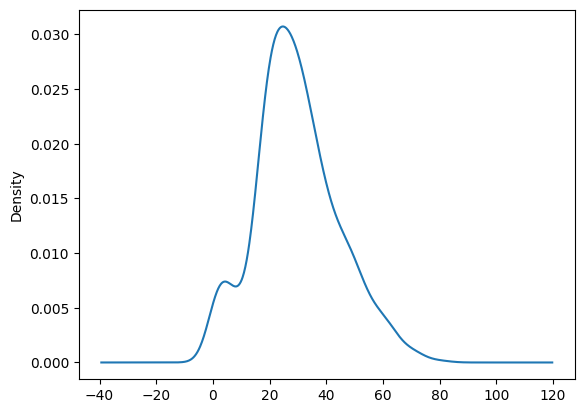

In [5]:
df['Age'].plot(kind='kde')

In [41]:
df['Age_imputed'] = df['Age']

In [50]:
df['Age_imputed'][df['Age_imputed'].isnull()] = df['Age_imputed'].dropna().sample(df['Age_imputed'].isnull().sum()).values

/tmp/ipykernel_14364/234607317.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Age_imputed'][df['Age_imputed'].isnull()] = df['Age_imputed'].dropna().sample(df['Age_imputed'].isnull().sum()).values
/tmp/ipykernel_14364/234607317.py:1

In [47]:
df.loc[df['Age_imputed'].isnull(), 'Age_imputed'] =  df['Age_imputed'].dropna().sample(df['Age_imputed'].isnull().sum()).values

In [48]:
df.isnull().sum()

Survived         0
Age            177
Fare             0
Age_imputed      0
dtype: int64

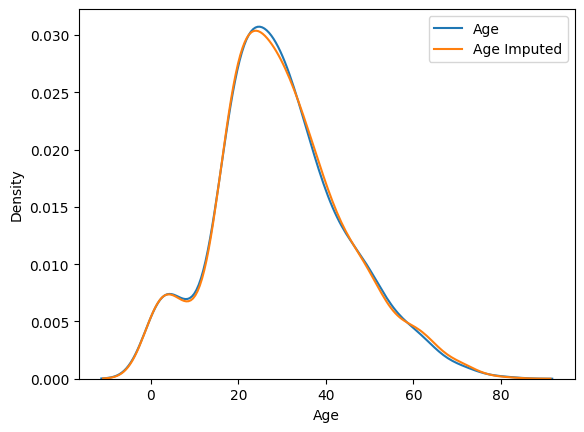

In [67]:
sns.kdeplot(data=df, x='Age', label='Age')
sns.kdeplot(data=df, x='Age_imputed', label='Age Imputed')

plt.legend()
plt.show()

In [69]:
df.cov()

,Survived,Age,Fare,Age_imputed
Survived,0.236772,-0.551296,6.221787,-0.534765
Age,-0.551296,211.019125,73.849030,211.019125
Fare,6.221787,73.849030,2469.436846,63.210823
Age_imputed,-0.534765,211.019125,63.210823,214.819834


In [74]:
df['Age'].var(), df['Age_imputed'].var()

(np.float64(211.01912474630802), np.float64(214.81983434898297))

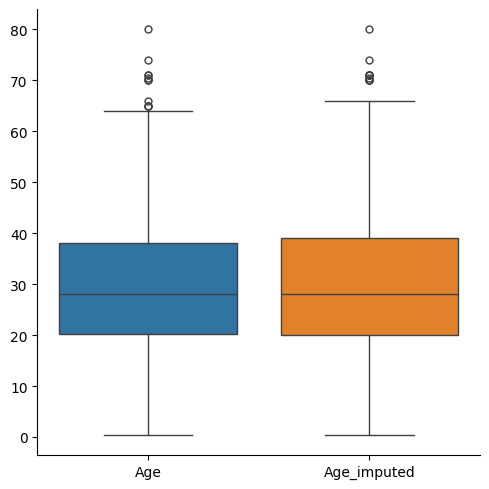

In [85]:
sns.catplot(kind='box', data=df[['Age', 'Age_imputed']])

In [141]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [142]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [143]:
data['FireplaceQu_imputed'] = data['FireplaceQu']
data['GarageQual_imputed'] = data['GarageQual']

In [144]:
data.loc[data['FireplaceQu_imputed'].isnull(), 'FireplaceQu_imputed'] = data['FireplaceQu'].dropna().sample(data['FireplaceQu'].isnull().sum()).values
data.loc[data['GarageQual_imputed'].isnull(), 'GarageQual_imputed'] = data['GarageQual'].dropna().sample(data['GarageQual'].isnull().sum()).values

In [145]:
data.isnull().sum()

FireplaceQu            690
GarageQual              81
SalePrice                0
FireplaceQu_imputed      0
GarageQual_imputed       0
dtype: int64

In [177]:
before = data['FireplaceQu'].value_counts()/data['FireplaceQu'].dropna().shape[0]
after = data['FireplaceQu_imputed'].value_counts()/data.shape[0]

pd.DataFrame({
    'Before Imputation' : before,
    'After Imputation' : after
})

,Before Imputation,After Imputation
Gd,0.493506,0.492466
TA,0.406494,0.404795
Fa,0.042857,0.043836
Ex,0.031169,0.032877
Po,0.025974,0.026027


In [176]:
before = data['GarageQual'].value_counts()/data['GarageQual'].dropna().shape[0]
after = data['GarageQual_imputed'].value_counts()/data.shape[0]

temp = pd.concat((before, after), axis=1)
temp.columns = ['Before Imputation', 'After Imputation']
temp

,Before Imputation,After Imputation
TA,0.950689,0.951370
Fa,0.034808,0.034932
Gd,0.010152,0.009589
Ex,0.002175,0.002055
Po,0.002175,0.002055


/tmp/ipykernel_14364/1974161070.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data[data['GarageQual']==col], x='SalePrice', label=col, ax=ax[0])
/tmp/ipykernel_14364/1974161070.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data[data['GarageQual_imputed']==col], x='SalePrice', label=col, ax=ax[1])


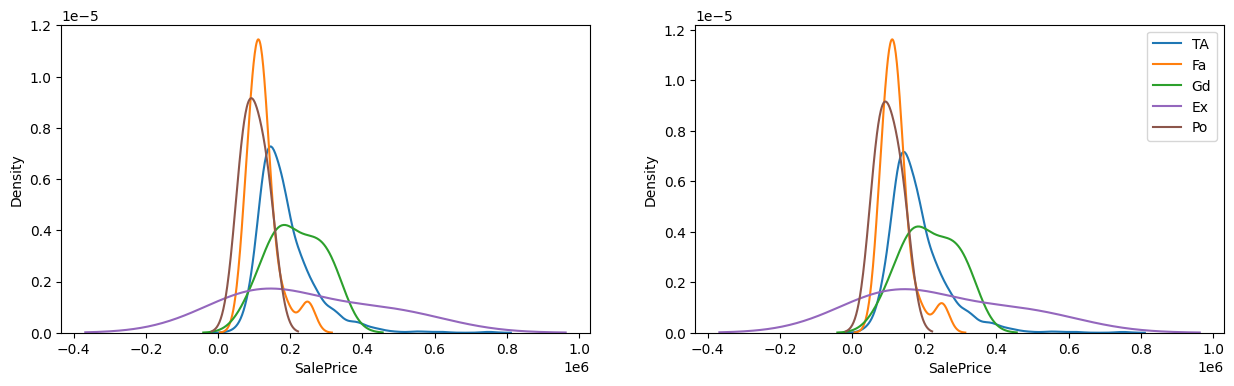

In [188]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
for col in data['GarageQual'].unique():
    sns.kdeplot(data=data[data['GarageQual']==col], x='SalePrice', label=col, ax=ax[0])
    sns.kdeplot(data=data[data['GarageQual_imputed']==col], x='SalePrice', label=col, ax=ax[1])
plt.legend()
plt.show()

/tmp/ipykernel_14364/3242648276.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data[data['FireplaceQu']==col], x='SalePrice', label=col, ax=ax[0])
/tmp/ipykernel_14364/3242648276.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data[data['FireplaceQu_imputed']==col], x='SalePrice', label=col, ax=ax[1])


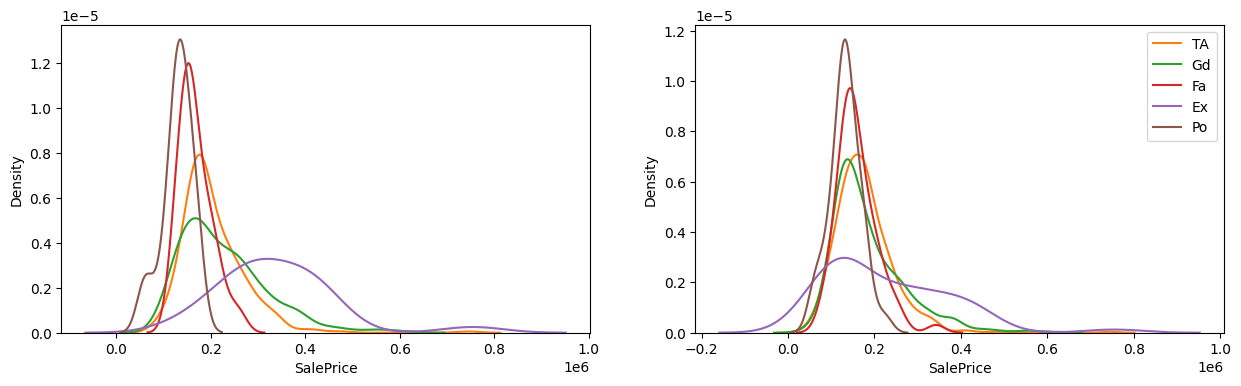

In [190]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
for col in data['FireplaceQu'].unique():
    sns.kdeplot(data=data[data['FireplaceQu']==col], x='SalePrice', label=col, ax=ax[0])
    sns.kdeplot(data=data[data['FireplaceQu_imputed']==col], x='SalePrice', label=col, ax=ax[1])
plt.legend()
plt.show()